# División de Ciencias e Ingenierías de la Universidad de Guanajuato
## Fundamentos de procesamiento digital de imágenes
## TAREA : Funciones de filtrado en frecuencia
### Profesor : Dr. Arturo González Vega
### Alumno : Gustavo Magaña López

In [1]:

import copy
import importlib
from typing import Tuple, List, NoReturn

import numpy as np
import scipy.fftpack as F
import scipy.io as io

import cv2
import matplotlib.image as img

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

import skimage
import skimage.morphology
import skimage.filters

from PIL import Image

import scipy.io as io

In [2]:
def reimport(module_name: str, alias: str = None, partial: bool = False) -> NoReturn:
    """
        Useless piece of code, literally.
    """
    _exec_str: str = ''
    
    if alias and not partial:
        _exec_str  = f"import {module_name} as {alias}\n"
        _exec_str += f"importlib.reload({alias})\n"
        _exec_str += f"from {module_name} import * \n"
    elif alias and partial:
        _exec_str  = f"import {module_name} as {alias}\n"
        _exec_str += f"importlib.reload({alias})\n"
    elif not alias and not partial:
        _exec_str  = f"import {module_name} as __reimport_tmp\n"
        _exec_str += f"importlib.reload(__reimport_tmp)\n"
        _exec_str += f"from {module_name} import * \n"
        
    exec(_exec_str)

##

In [103]:
# Importamos todas nuestras funciones (le Gus):
import mfilt_funcs as mine
importlib.reload(mine)
from mfilt_funcs import *

In [4]:
# Importamos todas nuestras funciones (la Pats):
"""
import filtro_notch as lapats
importlib.reload(lapats)
from filtro_notch import *
"""

'\nimport filtro_notch as lapats\nimportlib.reload(lapats)\nfrom filtro_notch import *\n'

In [5]:
def black_and_white(input_image_path):
   return Image.open(input_image_path).convert('L')

In [6]:
plt.rcParams['figure.figsize'] = (10, 10)

In [7]:
eps = np.finfo(float).eps
eps.setflags(write=False)

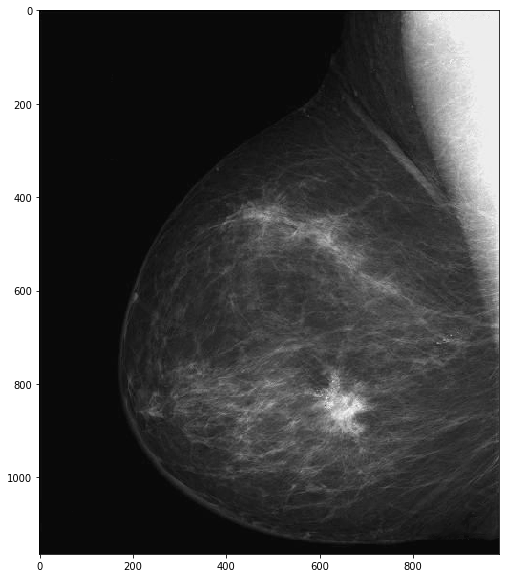

In [8]:
I = img.imread('imagenes/mama.tif')
plt.imshow(I, cmap='gray')

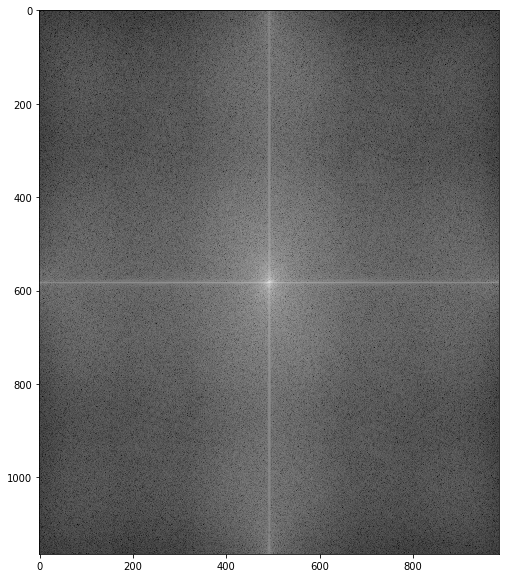

In [9]:
fft_viz(I)

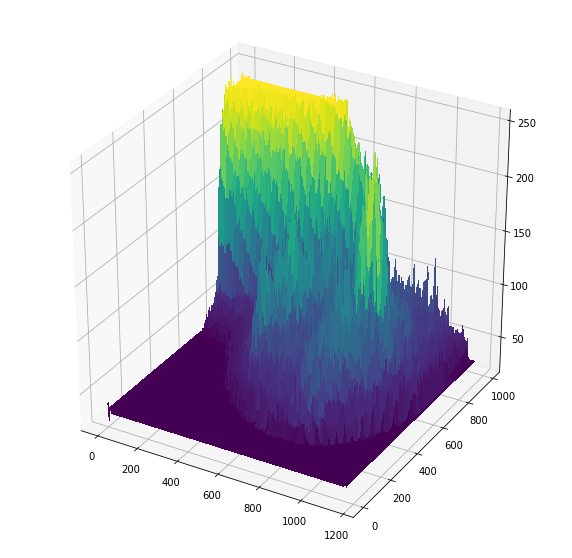

In [10]:
img_surf(I)

In [11]:
HighI = kernel_highpass(pre_fft_processing(I), Do=1500, form='gauss')

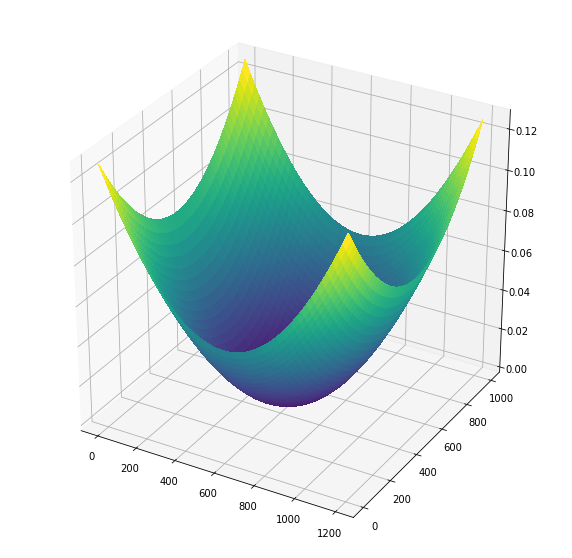

In [12]:
img_surf(HighI)

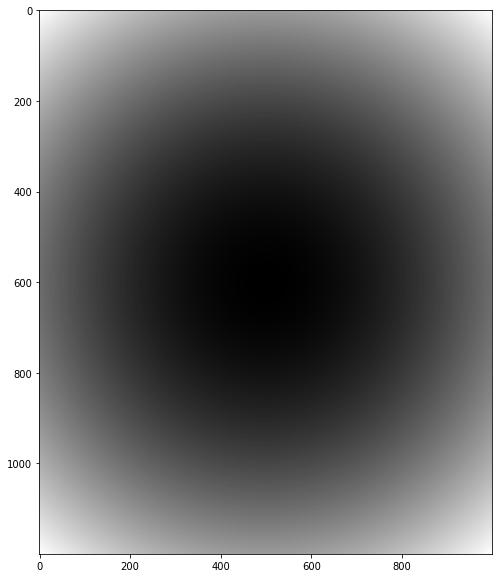

In [13]:
plt.imshow(HighI, cmap='gray')

In [14]:
list(map(cv2.getOptimalDFTSize, I.shape))

[1200, 1000]

In [15]:
I.shape

(1164, 984)

In [16]:
newI = pre_fft_processing(I)

In [41]:
x = cv2.imread('imagenes/RadiografiaRuidoCoherente.jpg', 0)

In [42]:
#io.m

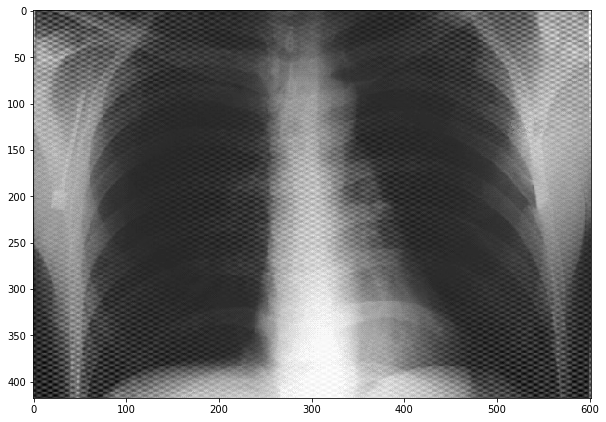

In [43]:
plt.imshow(x, cmap='gray')

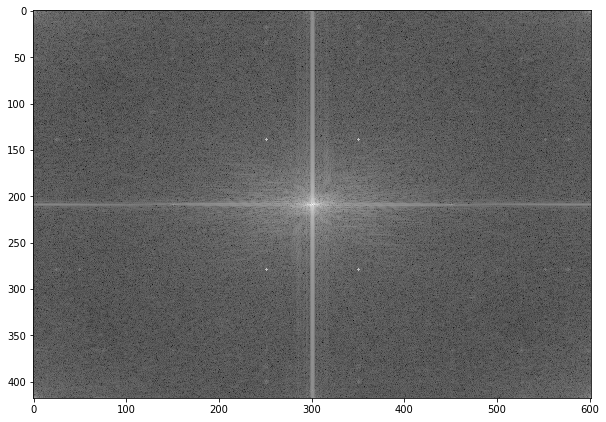

In [44]:
fft_viz(x)

In [21]:
"""
    Ideas = crear una matriz de desplazamientos.
    
"""

'\n    Ideas = crear una matriz de desplazamientos.\n    \n'

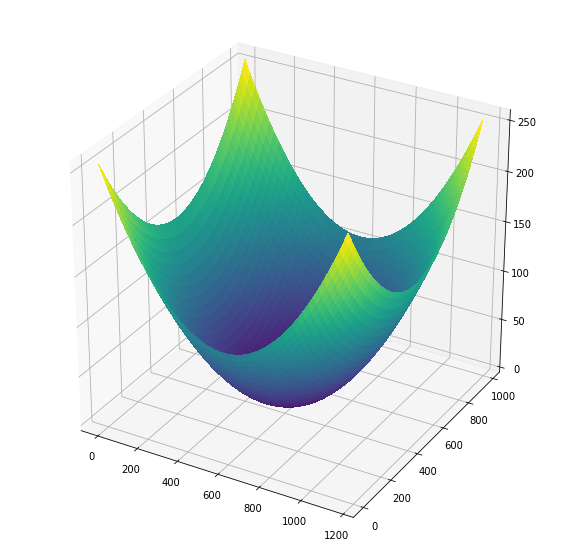

In [22]:
img_surf(distance_meshgrid_2D(I))

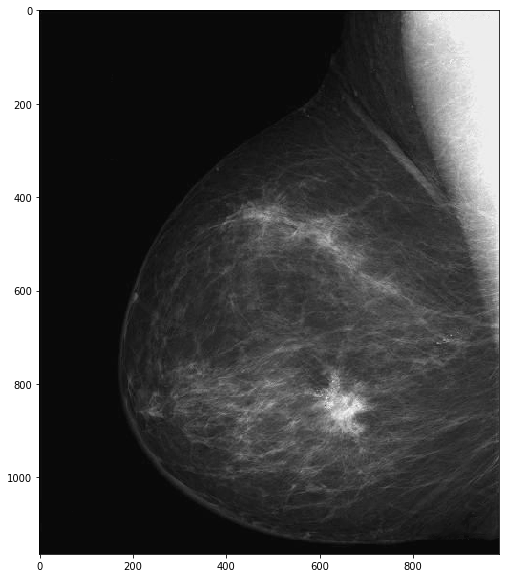

In [23]:
plt.imshow(I, cmap='gray')

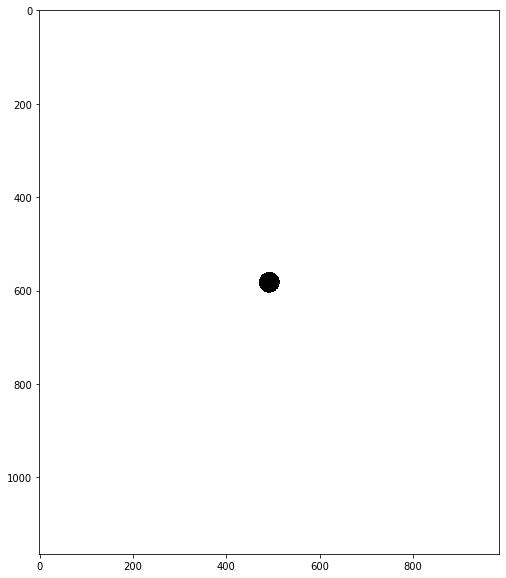

In [24]:
plt.imshow(kernel_highpass(I, Do=500, form='ideal'), cmap='gray')

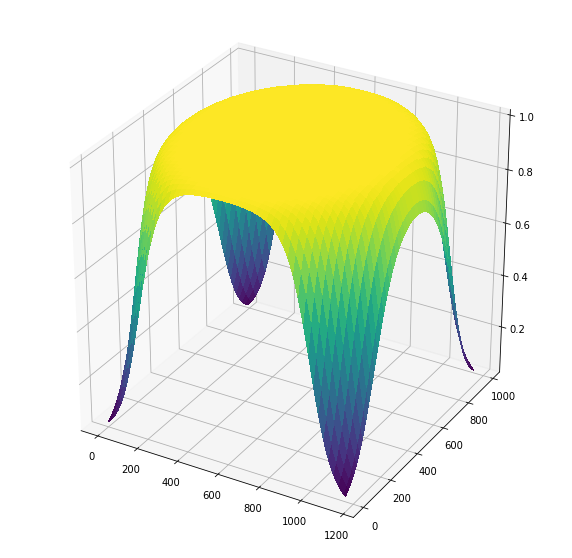

In [25]:
img_surf(kernel_lowpass(I, form='btw', Do=640, n=9), colormap=cm.viridis)

In [40]:
#dir(cm)

In [28]:
type(cm.coolwarm)

matplotlib.colors.LinearSegmentedColormap

In [29]:
aiuto = aiuda = jelp = help

In [30]:
aiuda(kernel_ideal)

Help on function kernel_ideal in module mfilt_funcs:

kernel_ideal(M, N, centro, d0)



In [32]:
#kernel_ideal(I.shape[0], I.shape[1], 0, (100, 400), 0, 100)

In [33]:
aiuto(master_kernel)

Help on function master_kernel in module mfilt_funcs:

master_kernel(image: numpy.ndarray, Do: int = 50, w: int = 15, wc1: int = None, wc2: int = None, kind: str = 'low', form: str = 'ideal', n: int = 1) -> numpy.ndarray
    Dados:
        una imagen
        un tipo de filtro (lowpass, highpass, bandpass, bandreject, notch)
        una folrmulación
        los parámetros de diseño necesarios
    
    Calcula (diseña) un kernel de acuerdo a todas las especificaciones dadas.



In [34]:
reimport('mfilt_funcs')

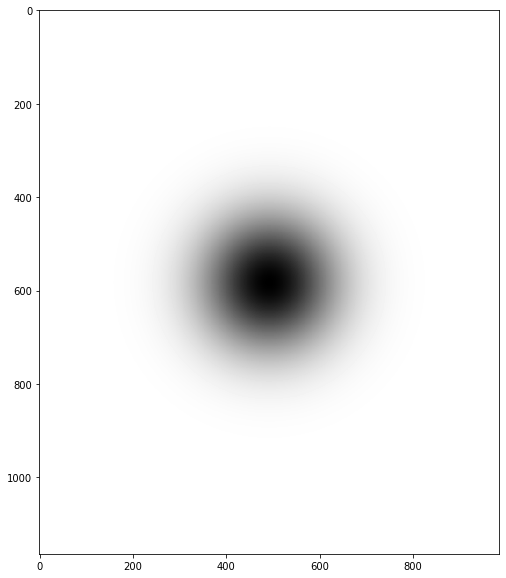

In [35]:
plt.imshow(master_kernel(I, Do=100, kind='high', form='gauss'), cmap='gray')

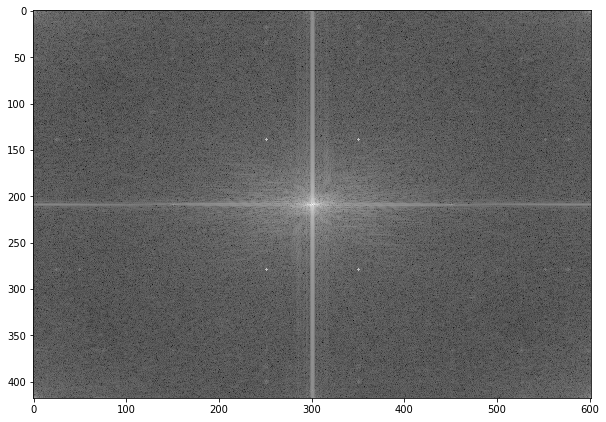

In [36]:
fft_viz(x)

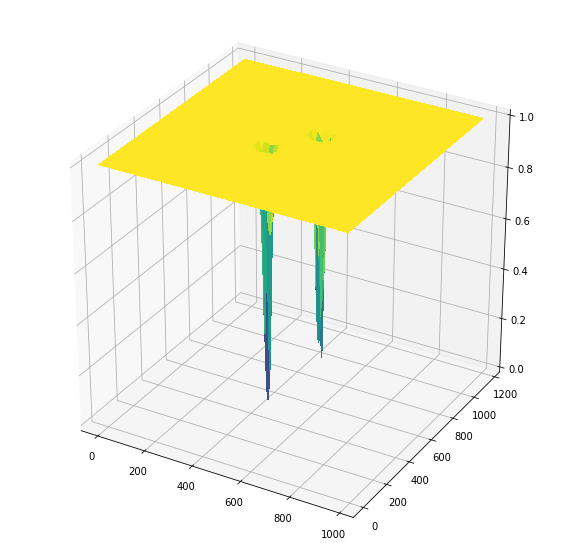

In [101]:
img_surf(kernel_notch(I, d0=15, centro=(100, 60), tipo=1, n=4))

In [77]:
type(my_kern)

numpy.ndarray

In [73]:
np.float64(my_kern)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [74]:
my_kern.

In [ ]:
img_surf(master_kernel(I, Do=10, center=(14, 55), kind='notchpass', form='gauss'))